## Grab screenshots from the oscilloscope

In [3]:
import visa
import numpy as np
import matplotlib.pyplot as plt

In [4]:
scope_name = 'USB0::0x0699::0x0373::C010223::INSTR'
rm = visa.ResourceManager()
scope = rm.open_resource(scope_name)

def get_waveform(channel, start, stop):
    from struct import unpack
    scope.write('DATA:SOU CH{0}'.format(channel))
    scope.write('DATA:WIDTH 1')
    scope.write('DATA:ENC RPB')
    scope.write('DATA:START {0}'.format(start))
    scope.write('DATA:STOP {0}'.format(stop))

    ymult = float(scope.ask('WFMPRE:YMULT?'))
    yzero = float(scope.ask('WFMPRE:YZERO?'))
    yoff = float(scope.ask('WFMPRE:YOFF?'))
    xincr = float(scope.ask('WFMPRE:XINCR?'))

    scope.write('CURVE?')
    data = scope.read_raw()
    headerlen = 2 + int(data[1])
    header = data[:headerlen]
    adc_wave = data[headerlen:-1]
    adc_wave = np.array(unpack('%sB' % len(adc_wave), adc_wave))
    volts = (adc_wave - yoff) * ymult + yzero
    time = np.arange(0, xincr * len(volts), xincr)
    return time, volts

In [16]:
time1, volts1 = get_waveform(1,1,1000000);
time2, volts2 = get_waveform(2,1,1000000);

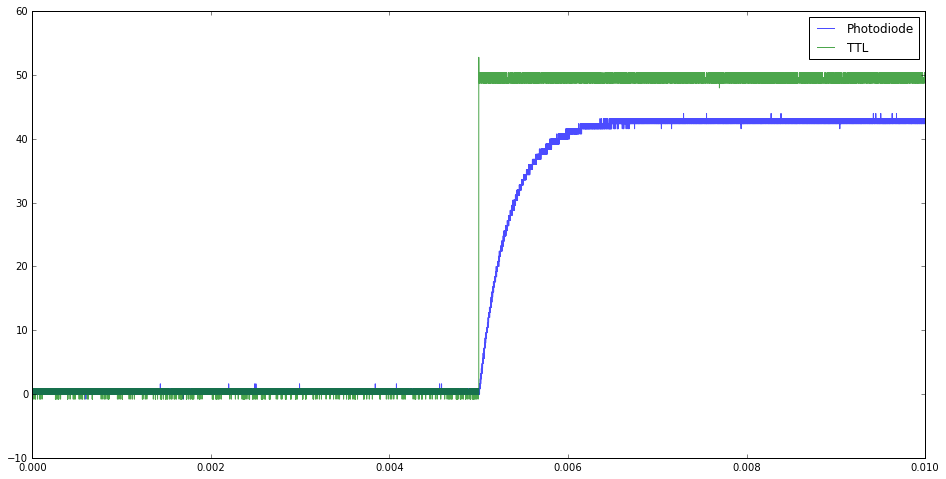

In [17]:
fig, axs = plt.subplots(figsize=(16,8))
plt.plot(time1, volts1, label='Photodiode', alpha = .7)
plt.plot(time2, volts2, label='TTL', alpha = .7)
plt.legend()
plt.show()


## Get a screenshot

In [19]:
scope_name = 'USB0::0x0699::0x0373::C010223::INSTR'
rm = visa.ResourceManager()
scope = rm.open_resource(scope_name)

def screengrab_scope(fname):
    scope.write('SAVE:IMAG:FILEF PNG')
    scope.write('HARDCOPY START')
    raw_data = scope.read_raw()
    with open(fname + '.png', 'wb') as fid:
        fid.write(raw_data)    

In [27]:
rd =screengrab_scope('F:/davis/tmp/control_enable_baseline')